### DESCARGA Y EXPLORACIÓN INICIAL DEL DATASET

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

import mysql.connector

conexion = mysql.connector.connect (user='EquipoE', password ='E1q2u3i4p5oE',
                                    host='212.227.90.6',
                                    database='Equip_E',
                                    port='3306')
print(conexion)

#Traemos la base de datos
Tourist_Accommodation = pd.read_sql("SELECT * FROM Tourist_Accommodation", conexion)

C:\Users\sguti\AppData\Local\Temp\ipykernel_23936\1846061012.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Tourist_Accommodation = pd.read_sql("SELECT * FROM Tourist_Accommodation", conexion)


In [7]:
print(Tourist_Accommodation.info())
Tourist_Accommodation.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   name                         9997 non-null   object 
 2   description                  9862 non-null   object 
 3   host_id                      10000 non-null  int64  
 4   neighbourhood_name           10000 non-null  object 
 5   neighbourhood_district       6079 non-null   object 
 6   room_type                    10000 non-null  object 
 7   accommodates                 10000 non-null  int64  
 8   bathrooms                    9926 non-null   object 
 9   bedrooms                     9930 non-null   object 
 10  beds                         9955 non-null   float64
 11  amenities_list               9983 non-null   object 
 12  price                        9746 non-null   float64
 13  minimum_nights   

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019
5,48764,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,220145,Torroella de Fluvi�,None,Entire home/apt,8,2,4,...,100.0,100.0,100.0,90.0,100.0,FALSO,27.0,spain,girona,19/02/2019
6,58512,Stylish & cozy 3BR near Sagrada Familia,Welcome to my home!<br /><br />My lovely 3 bed...,280070,el Camp de l'Arpa del Clot,Sant Mart�,Entire home/apt,6,2,3,...,90.0,90.0,90.0,90.0,90.0,VERDADERO,329.0,spain,barcelona,12/10/2020
7,71603,PENTHOUSE1 BEST PRICE 15/21.07 PROMO LAST MINUTE!,The apartment you are about to book has everyt...,366654,la Dreta de l'Eixample,Eixample,Entire home/apt,3,2,1,...,100.0,100.0,90.0,100.0,90.0,FALSO,42.0,spain,barcelona,06/07/2017
8,72150,Sunny attic duplex flat with terrace next to Sol,"The apartment is a quiet, secluded idyll in th...",364585,Embajadores,Centro,Entire home/apt,5,2,3,...,90.0,100.0,100.0,100.0,90.0,FALSO,91.0,spain,madrid,06/11/2020
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,el Camp d'en Grassot i Gr�cia Nova,Gr�cia,Entire home/apt,12,2,4,...,90.0,100.0,100.0,90.0,90.0,VERDADERO,14.0,spain,barcelona,09/06/2018


In [8]:
Tourist_Accommodation.shape

(10000, 35)

In [9]:
Tourist_Accommodation.columns.tolist()

['apartment_id',
 'name',
 'description',
 'host_id',
 'neighbourhood_name',
 'neighbourhood_district',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities_list',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'first_review_date',
 'last_review_date',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'is_instant_bookable',
 'reviews_per_month',
 'country',
 'city',
 'insert_date']

# EXPLORACIÓN DE DUPLICADOS:

In [10]:
# Verificar los apartment_id duplicados
duplicados = Tourist_Accommodation['apartment_id'].duplicated().sum()

print(f"El número de apartment_id duplicados es: {duplicados}")


El número de apartment_id duplicados es: 350


In [11]:
# Filtrar las filas con apartment_id duplicados
duplicados_filas = Tourist_Accommodation[Tourist_Accommodation['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
print(duplicados_filas)


      apartment_id                                               name  \
22          144471        BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI   
23          144471        BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI   
24          157327                     House in Llofriu (Costa Brava)   
25          157327                     House in Llofriu (Costa Brava)   
50          343864                    3 BD APT IN THE HEART OF GRACIA   
...            ...                                                ...   
9759      42922000  Hostal Bruselas Hab. #7 con ba�o privado y balc�n   
9788      43193627                                       Recoletos IX   
9789      43193627                                       Recoletos IX   
9852      43897607                          Finca rural Els Ametllers   
9853      43897607                          Finca rural Els Ametllers   

                                            description    host_id  \
22    HELLO PEOPLE :=)  are you on vacation? or busi.

### ANÁLISIS DE LOS DUPLICADOS ENCONTRADOS EN EL ID DE LOS APARTAMENTOS:

TRAS REVISAR INFORMACIÓN EN EXCEL, HEMOS DETECTADO QUE MUCHAS PROPIEDADES ESTÁN DUPLICADAS, REPITIENDO EL MISMO ID PERO CON DIFERENTES FECHAS DE CREACIÓN. ESTO SUCEDE PORQUE ALGUNOS PROPIETARIOS GENERAN NUEVOS ANUNCIOS PARA LA MISMA PROPIEDAD, YA SEA PARA INTENTAR EVITAR RESEÑAS NEGATIVAS O PARA INTENTAR EVADIR DEUDAS PENDIENTES, TAMBIÉN PUEDE TRATARSE DE UN ERROR AL SUBIR LA PROPIEDAD DE NUEVO POR FALTA DE COMUNICIACIÓN ENTRE EL EQUIPO ADMINISTRADOR DE LA PROPIEDAD. PARA MANTENER LA COHERENCIA EN EL ANÁLISIS, HEMOS DECIDIDO CONSERVAR ÚNICAMENTE LA VERSIÓN ORIGINAL, ES DECIR, LA QUE FUE CREADA PRIMERO, Y ANULAR LAS POSTERIORES. 

In [12]:
# Exportar las filas duplicadas a un archivo Excel
duplicados_filas.to_excel('duplicados_apartment_id.xlsx', index=False)

## EXPLORACIÓN Y ANÁLISIS DE NULOS DE NÚMERO DE HABITACIONES, BAÑOS Y CAMAS:

In [16]:
#Miramos cuantos tipos de habitaciones hay:
print(Tourist_Accommodation['room_type'].unique())


['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [17]:
#Que valores se repiten más:
print(Tourist_Accommodation['room_type'].value_counts())


room_type
Entire home/apt    6930
Private room       2913
Hotel room           83
Shared room          74
Name: count, dtype: int64


In [18]:
print(Tourist_Accommodation['bedrooms'].unique())

['1' '2' '4' '3' '5' '0' '6' '8' None '9' '14' '7' '10' '12' '16' '50']


In [19]:
print(Tourist_Accommodation['bedrooms'].value_counts())

bedrooms
1     4577
2     2287
3     1611
4      767
0      313
5      234
6       93
7       17
8       16
9        4
12       4
10       3
14       2
16       1
50       1
Name: count, dtype: int64


In [20]:
#Relación entre tipo de habitación y número de habitaciones:
result = Tourist_Accommodation.groupby('room_type')['bedrooms'].value_counts(dropna=False).reset_index(name='count')
print(result)


          room_type bedrooms  count
0   Entire home/apt        2   2135
1   Entire home/apt        1   1786
2   Entire home/apt        3   1573
3   Entire home/apt        4    757
4   Entire home/apt        0    262
5   Entire home/apt        5    228
6   Entire home/apt        6     91
7   Entire home/apt      NaN     53
8   Entire home/apt        7     17
9   Entire home/apt        8     14
10  Entire home/apt        9      4
11  Entire home/apt       10      3
12  Entire home/apt       12      3
13  Entire home/apt       14      2
14  Entire home/apt       16      1
15  Entire home/apt       50      1
16       Hotel room        1     66
17       Hotel room        2     12
18       Hotel room        3      3
19       Hotel room        0      1
20       Hotel room        5      1
21     Private room        1   2651
22     Private room        2    140
23     Private room        0     50
24     Private room        3     35
25     Private room      NaN     17
26     Private room        4

### ANÁLISIS:

SOLAMENTE TIENEN NULOS LA "PRIVATE ROOM" Y LA "ENTIRE HOME/APT", PARA MI SE DA POR SUPUESTO QUE ES 1. INCLUSO PODRÍAMOS SUBSTITUIS LOS VALORES 0 POR 1, DADO QUE YA SE SUPONE QUE HAY UNA HABITACIÓN 



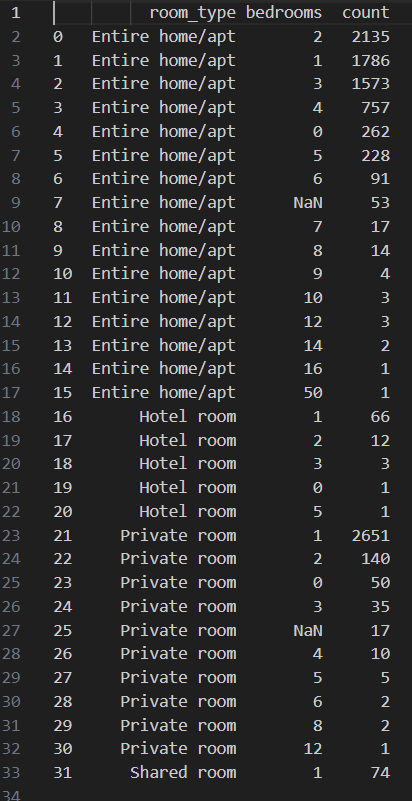

In [21]:
#Relación entre tipo de habitación y número de baños:
result = Tourist_Accommodation.groupby('room_type')['bathrooms'].value_counts(dropna=False).reset_index(name='count')
print(result)

          room_type bathrooms  count
0   Entire home/apt         1   3718
1   Entire home/apt         2   2121
2   Entire home/apt         3    617
3   Entire home/apt         4    257
4   Entire home/apt         5     96
5   Entire home/apt         6     43
6   Entire home/apt       NaN     33
7   Entire home/apt         7     16
8   Entire home/apt         0      9
9   Entire home/apt         8      9
10  Entire home/apt         9      5
11  Entire home/apt        12      3
12  Entire home/apt        11      2
13  Entire home/apt        10      1
14       Hotel room         1     68
15       Hotel room         2     10
16       Hotel room         3      2
17       Hotel room         5      2
18       Hotel room       NaN      1
19     Private room         1   2138
20     Private room         2    636
21     Private room         3     58
22     Private room       NaN     40
23     Private room         0     12
24     Private room         4     12
25     Private room         5      9
2

### ANÁLSIS:

EN ESTE CASO, NO HAY NINGÚN NULO EN "SHARED ROOM", ALGO QUE PODRÍA SER NORMAL PORQUE NORMALMENTE EN ESTE TIPO DE HABITACIÓN EL BAÑO SUELE ESTAR FUERA. EN "ENTIRE HOME/APARTMENT" HAY 33 NULOS. NO PUEDE ALQUILARSE UN APARTAMENTO SIN BAÑO, POR LO TANTO AHÍ LOS NULOS LOS PODEMOS SUBSTITUIR POR 1. EN "HOTEL RROM" SOLO HAY UN NULO, QUE PODEMOS PONER 1 TAMBIÉN Y POR ÚLTIMO NOS QUEDA EL "PRIVATE ROOM" QUE HAY 40, AHÍ SI QUE ES ALGO MÁS COMPLICADO PORQUE PUEDEN SER HOSTELS Y PUEDE HABER MÁS DE UNO. YO IGUALMENTE PONDRÍA 1 TAMBIÉN PORQUE ES LO QUE TIENE LA MAYORÍA (AL USUARIO LO ÚNICO QUE LE IMPORTA EN ESE CASO ES SI ESTÁ FUERA O DENTRO DE LA HABITACIÓN, NO LA CANTIDAD DE BAÑOS)

In [13]:
#Relación entre tipo de habitación y número de camas:
result = Tourist_Accommodation.groupby('room_type')['beds'].value_counts(dropna=False).reset_index(name='count')
print(result)

          room_type  beds  count
0   Entire home/apt   3.0   1466
1   Entire home/apt   2.0   1408
2   Entire home/apt   4.0   1113
3   Entire home/apt   1.0    979
4   Entire home/apt   5.0    788
5   Entire home/apt   6.0    496
6   Entire home/apt   7.0    225
7   Entire home/apt   8.0    170
8   Entire home/apt   9.0     72
9   Entire home/apt   0.0     70
10  Entire home/apt  10.0     60
11  Entire home/apt  12.0     27
12  Entire home/apt  16.0     12
13  Entire home/apt  11.0      9
14  Entire home/apt  14.0      7
15  Entire home/apt   NaN      6
16  Entire home/apt  13.0      5
17  Entire home/apt  15.0      5
18  Entire home/apt  18.0      3
19  Entire home/apt  22.0      3
20  Entire home/apt  20.0      2
21  Entire home/apt  17.0      1
22  Entire home/apt  21.0      1
23  Entire home/apt  28.0      1
24  Entire home/apt  30.0      1
25       Hotel room   1.0     36
26       Hotel room   2.0     22
27       Hotel room   3.0     10
28       Hotel room   4.0      7
29       H

### ANÁLISIS:

SUSTITUIREMOS POR DEFECTO LOS NULOS POR 1, ENTENDEMOS QUE HAY UNA CAMA EN ESTOS DOS TIPOS DE HABITACIÓN, PERO QUE POR ERROR NO LA PUSIERON.

## EXPLORACIÓN Y ANÁLISIS DE LOS NULOS DE LOS PRECIOS:

In [14]:
#Cuantos nulos hay por cada tipo de habitación:

null_counts = Tourist_Accommodation.groupby('room_type')['bedrooms'].apply(lambda x: x.isna().sum()).reset_index(name='null_count')
print(null_counts)


         room_type  null_count
0  Entire home/apt          53
1       Hotel room           0
2     Private room          17
3      Shared room           0


VEMOS QUE NO HAY MUCHOS, ASÍ QUE SUSTITUIRÍAMOS LOS NULOS POR LA MEDIA DE ESTE TIPO DE HABITACIÓN.  


In [16]:
#Averiguamos la media por cada tipo de habitación:

price_avg = Tourist_Accommodation.groupby('room_type')['price'].mean().reset_index()
print(price_avg)


         room_type        price
0  Entire home/apt  1250.480666
1       Hotel room  1046.527778
2     Private room   498.626606
3      Shared room   494.507042


# CONCLUSIONES:

1. PRIMERO ANULAMOS LOS DUPLICADOS SIGUIENDO LOS CRITERIOS DESCRITOS EN LA PRIMERA PARTE.
2. SUBSTITUIMOS LOS NULOS CON LOS ID´S RESTANTES SIGUIENDO LOS CRITERIOS DESCRITOS